### **Audio Classifier Project**

▶: Audio Classification Using Machine Learning

Submitted by:

- Sanjaya Gunawardena
- Liyang Fang

## Introduction
Audio classification is a fundamental task in various applications such as music genre classification, speech recognition, and environmental sound classification. In this project, we aim to develop and evaluate different machine learning classifiers to classify audio samples into various genres using a dataset containing audio features.






## Part 1 - Data Preprocessing

### 1.1 Loading the data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/features_30_sec.csv')

# Display the first few rows
print(df.head(10))


          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   
5  blues.00005.wav  661794          0.302456         0.087532  0.103494   
6  blues.00006.wav  661794          0.291328         0.093981  0.141874   
7  blues.00007.wav  661794          0.307955         0.092903  0.131822   
8  blues.00008.wav  661794          0.408879         0.086512  0.142416   
9  blues.00009.wav  661794          0.273950         0.092316  0.081314   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850           1.297741e+05   
1  0.002373             1530.176679           3.75

### 1.2 Feature Extraction

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Extract features and labels
X = df.drop(columns=['filename', 'label'])
y = df['label']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


### 1.3 Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### 1.4 Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Part 2 - Building and Evaluating Classifier

### 2.1 K-Nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the K-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Evaluate the classifier
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("K-NN Accuracy:", accuracy_knn)
print("K-NN Confusion Matrix:\n", conf_matrix_knn)
print("K-NN Classification Report:\n", class_report_knn)


K-NN Accuracy: 0.645
K-NN Confusion Matrix:
 [[11  0  3  0  0  0  1  0  1  4]
 [ 0 11  0  0  0  2  0  0  0  0]
 [ 1  1 20  2  0  1  0  0  1  1]
 [ 2  0  3 13  1  0  1  1  0  0]
 [ 0  0  0  2 10  0  0  1  2  0]
 [ 0  2  3  2  0 14  0  0  0  1]
 [ 0  0  0  3  0  0 21  0  0  1]
 [ 1  0  0  1  0  1  0  9  1  0]
 [ 1  0  1  4  4  0  2  1 10  0]
 [ 3  0  3  2  0  1  0  1  1 10]]
K-NN Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.79      0.85      0.81        13
           2       0.61      0.74      0.67        27
           3       0.45      0.62      0.52        21
           4       0.67      0.67      0.67        15
           5       0.74      0.64      0.68        22
           6       0.84      0.84      0.84        25
           7       0.69      0.69      0.69        13
           8       0.62      0.43      0.51        23
           9       0.59      0.48      0.53        21


### 2.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf.fit(X_train_scaled, y_train)

# Evaluate the classifier
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)



Random Forest Accuracy: 0.76
Random Forest Confusion Matrix:
 [[14  0  1  0  0  1  2  0  0  2]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 4  0 19  0  0  0  0  0  0  4]
 [ 0  0  0 15  4  0  1  0  0  1]
 [ 0  0  0  1 13  0  0  0  1  0]
 [ 1  0  1  0  0 20  0  0  0  0]
 [ 0  0  0  1  0  0 24  0  0  0]
 [ 0  0  1  0  1  0  0  8  3  0]
 [ 2  0  1  2  4  0  1  0 13  0]
 [ 0  0  1  2  1  2  0  1  1 13]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       1.00      1.00      1.00        13
           2       0.79      0.70      0.75        27
           3       0.71      0.71      0.71        21
           4       0.57      0.87      0.68        15
           5       0.87      0.91      0.89        22
           6       0.86      0.96      0.91        25
           7       0.89      0.62      0.73        13
           8       0.72      0.57      0.63        23
           9       0.65     

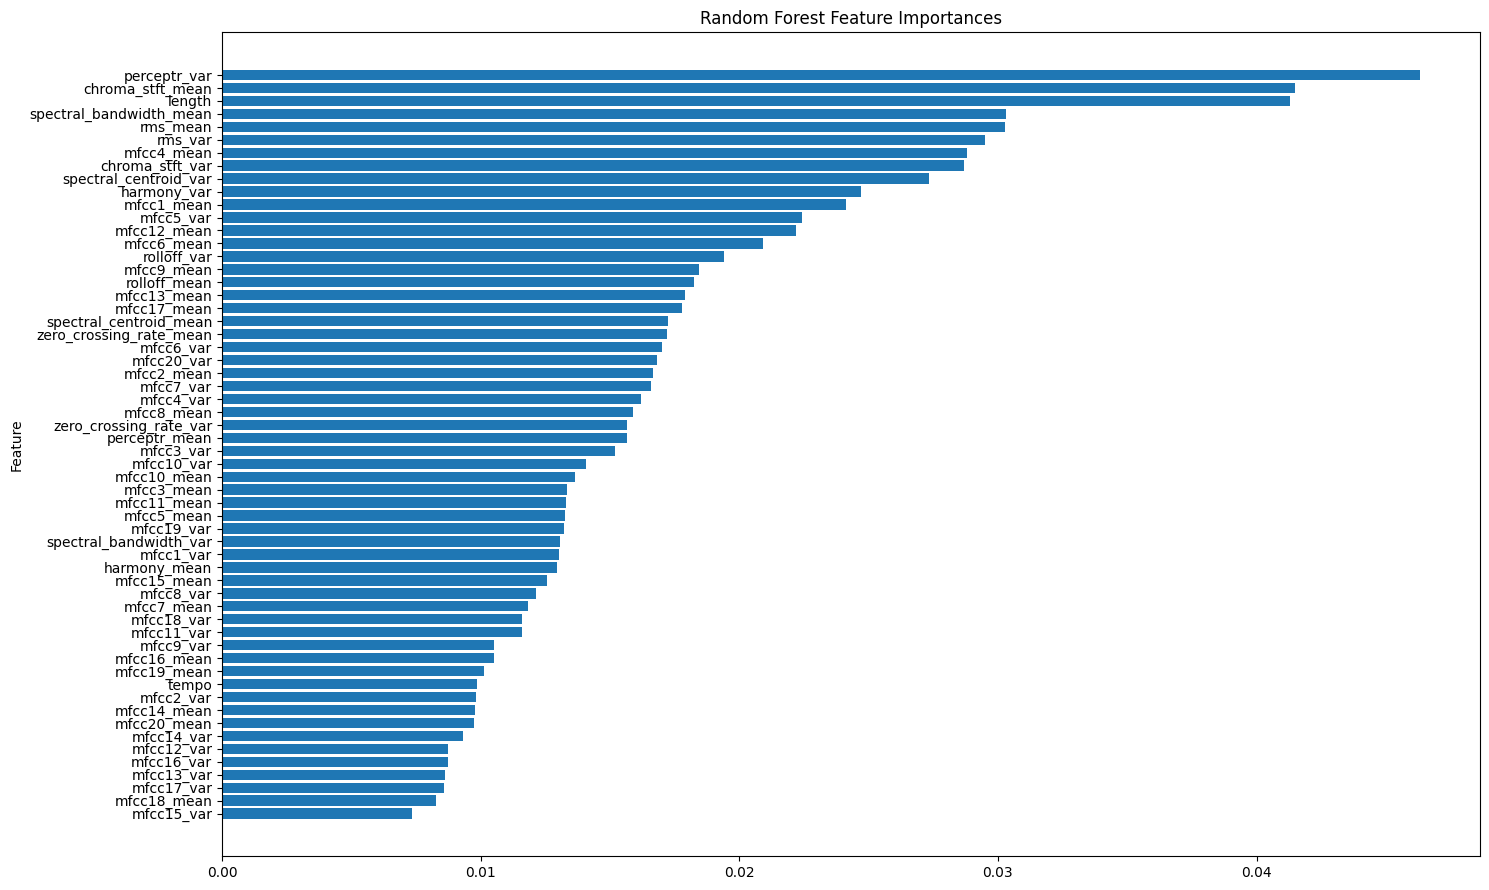

In [ ]:
import numpy as np
# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::1]

# Plot feature importances
plt.figure(figsize=(15, 9))
plt.title("Random Forest Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 2.3 SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred_svm)
print('Classification Report:')
print(class_report)

Accuracy: 0.69
Confusion Matrix:
[[16  0  0  0  0  1  0  0  1  2]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 5  0 18  0  0  0  0  0  0  4]
 [ 1  0  1 12  3  0  0  1  2  1]
 [ 0  0  0  0 13  0  0  0  2  0]
 [ 3  0  2  1  0 15  0  0  0  1]
 [ 1  0  0  1  1  0 21  0  0  1]
 [ 0  0  0  0  0  0  0 11  2  0]
 [ 3  0  1  3  4  0  0  1 10  1]
 [ 2  0  3  2  2  0  1  0  2  9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.80      0.63        20
           1       1.00      0.92      0.96        13
           2       0.72      0.67      0.69        27
           3       0.63      0.57      0.60        21
           4       0.57      0.87      0.68        15
           5       0.88      0.68      0.77        22
           6       0.95      0.84      0.89        25
           7       0.85      0.85      0.85        13
           8       0.53      0.43      0.48        23
           9       0.47      0.43      0.45        21

    accuracy     

### 2.4 GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy: {accuracy_gb:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred_gb)
print('Classification Report:')
print(class_report)

Accuracy: 0.76
Confusion Matrix:
[[17  0  1  0  0  0  1  0  0  1]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 4  0 16  1  0  0  0  0  3  3]
 [ 0  0  0 16  4  0  0  0  0  1]
 [ 0  0  0  1 12  0  0  0  2  0]
 [ 1  0  0  1  0 20  0  0  0  0]
 [ 0  0  0  1  0  0 23  0  1  0]
 [ 0  0  0  0  0  0  0 10  3  0]
 [ 1  0  2  0  2  0  1  1 13  3]
 [ 1  0  4  0  2  0  0  1  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       1.00      1.00      1.00        13
           2       0.70      0.59      0.64        27
           3       0.80      0.76      0.78        21
           4       0.60      0.80      0.69        15
           5       1.00      0.91      0.95        22
           6       0.92      0.92      0.92        25
           7       0.83      0.77      0.80        13
           8       0.57      0.57      0.57        23
           9       0.60      0.57      0.59        21

    accuracy     

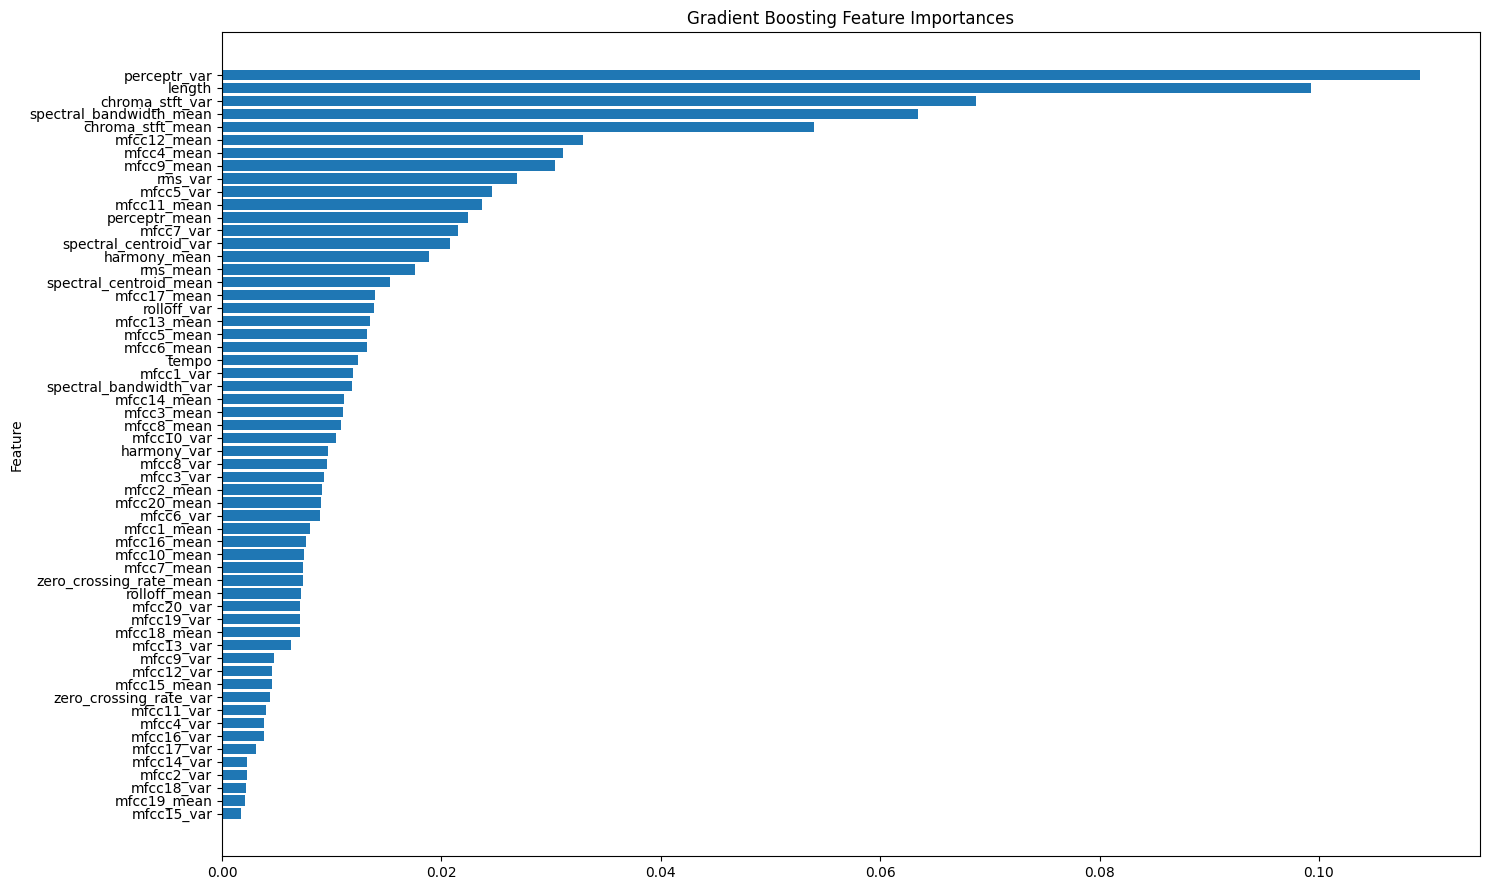

In [ ]:
importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[::1]

plt.figure(figsize=(15, 9))
plt.title("Gradient Boosting Feature Importances")
plt.barh(range(X.shape[1]), importances_gb[indices_gb], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices_gb])
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### 2.5 MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy_mlp:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred_mlp)
print('Confusion Matrix:')
print(conf_matrix)

class_report = classification_report(y_test, y_pred_mlp)
print('Classification Report:')
print(class_report)

Accuracy: 0.75
Confusion Matrix:
[[17  0  2  0  0  0  0  0  0  1]
 [ 0 12  0  0  0  1  0  0  0  0]
 [ 3  0 19  0  0  0  0  1  1  3]
 [ 2  0  1 14  2  0  0  0  2  0]
 [ 0  0  0  1 12  0  1  0  1  0]
 [ 0  1  0  1  0 19  0  1  0  0]
 [ 1  0  0  1  0  0 22  0  0  1]
 [ 1  0  0  0  0  0  0 11  1  0]
 [ 1  0  1  3  2  0  3  1 10  2]
 [ 0  0  1  3  0  0  0  1  2 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76        20
           1       0.92      0.92      0.92        13
           2       0.79      0.70      0.75        27
           3       0.61      0.67      0.64        21
           4       0.75      0.80      0.77        15
           5       0.95      0.86      0.90        22
           6       0.85      0.88      0.86        25
           7       0.73      0.85      0.79        13
           8       0.59      0.43      0.50        23
           9       0.67      0.67      0.67        21

    accuracy     

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


### Part 3 Analysis and Visualization

### 3.1 Accuracy Comparison

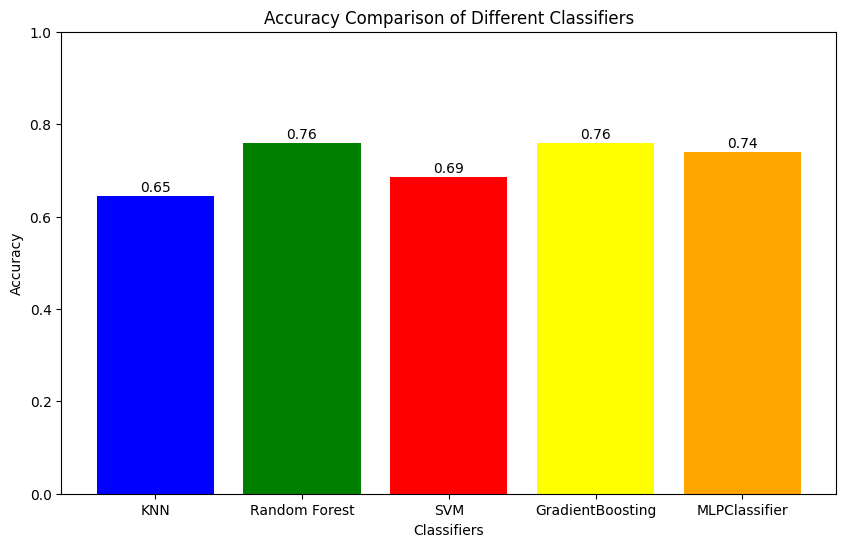

In [ ]:
Classifiers = ['KNN', 'Random Forest', 'SVM', 'GradientBoosting', 'MLPClassifier']
accuracies = [accuracy_knn, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_mlp]

plt.figure(figsize=(10, 6))
plt.bar(Classifiers, accuracies, color=['blue', 'green', 'red', 'yellow', 'orange'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)
for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')
plt.show()